### Aim: Perform EDA such as number of data samples, number of features, number of classes, number of data samples per class, removing missing values, conversion to numbers, using seaborn library to plot different graphs.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/content/sample_data/crime_marijuana.csv")
column = df.columns.tolist()
print(df.shape)

(1254, 14)


In [3]:
df

,INCIDENT_ID,FIRST_OCCURENCE_DATE,LAST_OCCURENCE_DATE,REPORTDATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,MJ_RELATION_TYPE,NEIGHBORHOOD_ID
0,201279583,27-Feb-12,27-Feb-12,27-Feb-12,5702 E COLFAX AVE,3162682.0,1694930.0,2,222,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY\r,montclair
1,2012355975,06-Aug-12,06-Aug-12,06-Aug-12,3054 LARIMER ST,3146378.0,1703160.0,2,211,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY\r,five-points
2,2012433617,18-Sep-12,18-Sep-12,18-Sep-12,9206 E HAMPDEN AVE,3174408.0,1662984.0,3,323,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY\r,hampden-south
3,2012378437,18-Aug-12,18-Aug-12,19-Aug-12,5403 N BILLINGS ST,3189349.0,1714135.0,5,512,5707,CRIMINAL TRESPASSING,All Other Crimes,NON-INDUSTRY\r,montbello
4,2012541015,21-Nov-12,21-Nov-12,21-Nov-12,82 S FEDERAL BLVD,3133690.0,1685664.0,4,411,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY\r,valverde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2016611035,19-Sep-16,19-Sep-16,23-Sep-16,1178 S KALAMATH ST,3140643.0,1678536.0,4,422,2399,THEFT - OTHER,Larceny,INDUSTRY\r,ruby-hill
1250,2016564626,03-Sep-16,NaN,03-Sep-16,3887 N STEELE ST,3153496.0,1705991.0,2,212,1202,ROBBERY - BUSINESS,Robbery-Business,INDUSTRY\r,clayton
1251,2016648048,08-Oct-16,09-Oct-16,09-Oct-16,324 S LEYDEN ST,3164614.0,1684229.0,3,321,2399,THEFT - OTHER,Larceny,NON-INDUSTRY\r,washington-virginia-vale
1252,2016692084,28-Oct-16,NaN,28-Oct-16,260 N SANTA FE DR,3141128.0,1687684.0,3,311,1202,ROBBERY - BUSINESS,Robbery-Business,INDUSTRY\r,baker


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INCIDENT_ID           1254 non-null   int64  
 1   FIRST_OCCURENCE_DATE  1254 non-null   object 
 2   LAST_OCCURENCE_DATE   1001 non-null   object 
 3   REPORTDATE            1254 non-null   object 
 4   INCIDENT_ADDRESS      1254 non-null   object 
 5   GEO_X                 1253 non-null   float64
 6   GEO_Y                 1253 non-null   float64
 7   DISTRICT_ID           1254 non-null   int64  
 8   PRECINCT_ID           1254 non-null   int64  
 9   OFFENSE_CODE          1254 non-null   int64  
 10  OFFENSE_TYPE_ID       1254 non-null   object 
 11  OFFENSE_CATEGORY_ID   1254 non-null   object 
 12  MJ_RELATION_TYPE      1254 non-null   object 
 13  NEIGHBORHOOD_ID       1254 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 137.3+ KB


In [5]:
print("Column_name".ljust(23) + "Null\n")
for col in column:
  print(col.ljust(23),end='')
  print(str(df[col].isnull().sum()))

Column_name            Null

INCIDENT_ID            0
FIRST_OCCURENCE_DATE   0
LAST_OCCURENCE_DATE    253
REPORTDATE             0
INCIDENT_ADDRESS       0
GEO_X                  1
GEO_Y                  1
DISTRICT_ID            0
PRECINCT_ID            0
OFFENSE_CODE           0
OFFENSE_TYPE_ID        0
OFFENSE_CATEGORY_ID    0
MJ_RELATION_TYPE       0
NEIGHBORHOOD_ID        0


In [6]:
print("Column_name".ljust(23) + "Unique_value_count")
for col in df.columns:
  print(col.ljust(20),end=" - ")
  print(str(df[col].nunique()))


Column_name            Unique_value_count
INCIDENT_ID          - 1196
FIRST_OCCURENCE_DATE - 826
LAST_OCCURENCE_DATE  - 701
REPORTDATE           - 824
INCIDENT_ADDRESS     - 680
GEO_X                - 667
GEO_Y                - 672
DISTRICT_ID          - 8
PRECINCT_ID          - 33
OFFENSE_CODE         - 45
OFFENSE_TYPE_ID      - 53
OFFENSE_CATEGORY_ID  - 14
MJ_RELATION_TYPE     - 2
NEIGHBORHOOD_ID      - 77


In [7]:
df = df.drop(axis=1,columns=['LAST_OCCURENCE_DATE'])


In [8]:
df1 = df.dropna()
df1.shape

(1253, 13)

In [9]:
column = df.columns.tolist()

In [10]:
categorical = ['FIRST_OCCURENCE_DATE', 'REPORTDATE', 'INCIDENT_ADDRESS', 'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'MJ_RELATION_TYPE', 'NEIGHBORHOOD_ID', 'DISTRICT_ID', 'PRECINCT_ID', 'OFFENSE_CODE']
categorical

['FIRST_OCCURENCE_DATE',
 'REPORTDATE',
 'INCIDENT_ADDRESS',
 'OFFENSE_TYPE_ID',
 'OFFENSE_CATEGORY_ID',
 'MJ_RELATION_TYPE',
 'NEIGHBORHOOD_ID',
 'DISTRICT_ID',
 'PRECINCT_ID',
 'OFFENSE_CODE']

In [11]:
df1

,INCIDENT_ID,FIRST_OCCURENCE_DATE,REPORTDATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,MJ_RELATION_TYPE,NEIGHBORHOOD_ID
0,201279583,27-Feb-12,27-Feb-12,5702 E COLFAX AVE,3162682.0,1694930.0,2,222,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY\r,montclair
1,2012355975,06-Aug-12,06-Aug-12,3054 LARIMER ST,3146378.0,1703160.0,2,211,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY\r,five-points
2,2012433617,18-Sep-12,18-Sep-12,9206 E HAMPDEN AVE,3174408.0,1662984.0,3,323,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY\r,hampden-south
3,2012378437,18-Aug-12,19-Aug-12,5403 N BILLINGS ST,3189349.0,1714135.0,5,512,5707,CRIMINAL TRESPASSING,All Other Crimes,NON-INDUSTRY\r,montbello
4,2012541015,21-Nov-12,21-Nov-12,82 S FEDERAL BLVD,3133690.0,1685664.0,4,411,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY\r,valverde
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2016611035,19-Sep-16,23-Sep-16,1178 S KALAMATH ST,3140643.0,1678536.0,4,422,2399,THEFT - OTHER,Larceny,INDUSTRY\r,ruby-hill
1250,2016564626,03-Sep-16,03-Sep-16,3887 N STEELE ST,3153496.0,1705991.0,2,212,1202,ROBBERY - BUSINESS,Robbery-Business,INDUSTRY\r,clayton
1251,2016648048,08-Oct-16,09-Oct-16,324 S LEYDEN ST,3164614.0,1684229.0,3,321,2399,THEFT - OTHER,Larceny,NON-INDUSTRY\r,washington-virginia-vale
1252,2016692084,28-Oct-16,28-Oct-16,260 N SANTA FE DR,3141128.0,1687684.0,3,311,1202,ROBBERY - BUSINESS,Robbery-Business,INDUSTRY\r,baker


In [12]:
count_dict={}
for col in categorical[2:]:
  x = df1[col].replace("\\s-|-\\s",'',regex=True)
  x = x.replace("\\s",'_',regex=True)
  df1.drop(col,axis=1,inplace=True)
  df1[col] = x
  col_values = df1[col].tolist()
  classes = df1[col].unique().tolist()
  if not (np.issubdtype(df[col].dtype,np.number)):
    classes = [x.replace(' ','_') for x in classes]

  print("\n" + col +"("+str(len(classes))+") :\n")
  print("Class Name".ljust(35) + "Count\n")

  y=[]
  for x in classes:
    print(str(x).ljust(35) + str(col_values.count(x)))
    y.append([x,col_values.count(x)])
  count_dict[col]=y


INCIDENT_ADDRESS(679) :

Class Name                         Count

5702_E_COLFAX_AVE                  3
3054_LARIMER_ST                    3
9206_E_HAMPDEN_AVE                 2
5403_N_BILLINGS_ST                 2
82_S_FEDERAL_BLVD                  2
1201_20TH_ST                       3
1730_E_17TH_AVE                    1
1568_S_FEDERAL_BLVD                4
80_S_PENNSYLVANIA_ST               4
1660_E_40TH_AVE                    5
1499_N_BROADWAY_ST                 5
1432_E_22ND_AVE                    1
1853_S_LINCOLN_ST                  1
4773_N_FOX_ST                      7
543_N_BRYANT_ST                    4
2568_S_BROADWAY_ST                 4
2266_S_BROADWAY_ST                 1
1172_W_VIRGINIA_AVE                4
2700_BLOCK_WELTON_ST               1
5526_N_CRYSTAL_WAY                 1
2668_W_COLLEGE_AVE                 2
5885_E_EVANS_AVE                   8
2647_W_38TH_AVE                    2
109_W_12TH_AVE                     1
155_S_PECOS_ST                     4
4040_E_

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


205_N_YUMA_ST                      1
5055_E_38TH_AVE                    1
1445_S_PEARL_ST                    5
20_E_9TH_AVE                       2
2000_W_32ND_AVE                    1
4513_N_FAIRPLAY_WAY                1
211_N_WYANDOT_ST                   2
2640_E_43RD_AVE                    3
4981_E_CORNELL_AVE                 2
2865_S_COLORADO_BLVD               1
7801_E_COLFAX_AVE                  4
1529_N_YORK_ST                     1
310_N_ST_PAUL_ST                   2
3000_N_GLENCOE_ST                  1
1135_W_CUSTER_PL                   1
1338_S_JASON_ST                    1
1490_W_MAPLE_AVE                   1
1115_S_BANNOCK_ST                  3
803_S_JASON_ST                     2
6855_LEETSDALE_DR                  1
2215_E_MISSISSIPPI_AVE             1
1811_S_QUEBEC_WAY                  1
1000_BLOCK_N_SHERMAN_ST            1
3857_N_ELM_ST                      1
1237_N_SHOSHONE_ST                 1
5378_N_BILLINGS_ST                 1
1640_E_EVANS_AVE                   3
3

In [13]:
column[1:3]

['FIRST_OCCURENCE_DATE', 'REPORTDATE']

In [14]:
for col in column[1:3]:
  x = pd.to_datetime(df1[col])
  # df1.drop(col,axis=1,inplace=True)
  df1[col] = x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
df1

,INCIDENT_ID,FIRST_OCCURENCE_DATE,REPORTDATE,GEO_X,GEO_Y,INCIDENT_ADDRESS,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,MJ_RELATION_TYPE,NEIGHBORHOOD_ID,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE
0,201279583,2012-02-27,2012-02-27,3162682.0,1694930.0,5702_E_COLFAX_AVE,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,montclair,2,222,2203
1,2012355975,2012-08-06,2012-08-06,3146378.0,1703160.0,3054_LARIMER_ST,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,five-points,2,211,2203
2,2012433617,2012-09-18,2012-09-18,3174408.0,1662984.0,9206_E_HAMPDEN_AVE,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,hampden-south,3,323,2203
3,2012378437,2012-08-18,2012-08-19,3189349.0,1714135.0,5403_N_BILLINGS_ST,CRIMINAL_TRESPASSING,All_Other_Crimes,NON-INDUSTRY_,montbello,5,512,5707
4,2012541015,2012-11-21,2012-11-21,3133690.0,1685664.0,82_S_FEDERAL_BLVD,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,valverde,4,411,2203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2016611035,2016-09-19,2016-09-23,3140643.0,1678536.0,1178_S_KALAMATH_ST,THEFT_OTHER,Larceny,INDUSTRY_,ruby-hill,4,422,2399
1250,2016564626,2016-09-03,2016-09-03,3153496.0,1705991.0,3887_N_STEELE_ST,ROBBERY_BUSINESS,Robbery-Business,INDUSTRY_,clayton,2,212,1202
1251,2016648048,2016-10-08,2016-10-09,3164614.0,1684229.0,324_S_LEYDEN_ST,THEFT_OTHER,Larceny,NON-INDUSTRY_,washington-virginia-vale,3,321,2399
1252,2016692084,2016-10-28,2016-10-28,3141128.0,1687684.0,260_N_SANTA_FE_DR,ROBBERY_BUSINESS,Robbery-Business,INDUSTRY_,baker,3,311,1202


In [16]:
df2 = df1[column]
df2

,INCIDENT_ID,FIRST_OCCURENCE_DATE,REPORTDATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,MJ_RELATION_TYPE,NEIGHBORHOOD_ID
0,201279583,2012-02-27,2012-02-27,5702_E_COLFAX_AVE,3162682.0,1694930.0,2,222,2203,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,montclair
1,2012355975,2012-08-06,2012-08-06,3054_LARIMER_ST,3146378.0,1703160.0,2,211,2203,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,five-points
2,2012433617,2012-09-18,2012-09-18,9206_E_HAMPDEN_AVE,3174408.0,1662984.0,3,323,2203,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,hampden-south
3,2012378437,2012-08-18,2012-08-19,5403_N_BILLINGS_ST,3189349.0,1714135.0,5,512,5707,CRIMINAL_TRESPASSING,All_Other_Crimes,NON-INDUSTRY_,montbello
4,2012541015,2012-11-21,2012-11-21,82_S_FEDERAL_BLVD,3133690.0,1685664.0,4,411,2203,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,valverde
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2016611035,2016-09-19,2016-09-23,1178_S_KALAMATH_ST,3140643.0,1678536.0,4,422,2399,THEFT_OTHER,Larceny,INDUSTRY_,ruby-hill
1250,2016564626,2016-09-03,2016-09-03,3887_N_STEELE_ST,3153496.0,1705991.0,2,212,1202,ROBBERY_BUSINESS,Robbery-Business,INDUSTRY_,clayton
1251,2016648048,2016-10-08,2016-10-09,324_S_LEYDEN_ST,3164614.0,1684229.0,3,321,2399,THEFT_OTHER,Larceny,NON-INDUSTRY_,washington-virginia-vale
1252,2016692084,2016-10-28,2016-10-28,260_N_SANTA_FE_DR,3141128.0,1687684.0,3,311,1202,ROBBERY_BUSINESS,Robbery-Business,INDUSTRY_,baker


In [17]:
categorical[2:]

['INCIDENT_ADDRESS',
 'OFFENSE_TYPE_ID',
 'OFFENSE_CATEGORY_ID',
 'MJ_RELATION_TYPE',
 'NEIGHBORHOOD_ID',
 'DISTRICT_ID',
 'PRECINCT_ID',
 'OFFENSE_CODE']

In [18]:

numerical_rept = {}
categorical_rept={}
for col in categorical[2:]:
  classes = df2[col].unique().tolist()
  # print(len(classes))
  # print(classes)
  num_range = list(range(0,len(classes)))
  # print(num_range)
  l={}
  l1={}
  for i in range(len(classes)):
    l[classes[i]]=num_range[i]
    l1[num_range[i]]=classes[i]

    # l.append((classes[i],num_range[i]))
  numerical_rept[col] = l
  categorical_rept[col] = l1
  # print(col + " : ")
  # print(end='\t')
  # print(classes)
  # print(end='\t')
  # print(num_range)
  df2[col].replace(classes,num_range,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
numerical_rept

{'DISTRICT_ID': {1: 5, 2: 0, 3: 1, 4: 3, 5: 2, 6: 4, 7: 6},
 'INCIDENT_ADDRESS': {'0_BLOCK_S_SANTA_FE_DR': 651,
  '1000_BLOCK_N_SHERMAN_ST': 320,
  '1005_N_FEDERAL_BLVD': 38,
  '1015_W_EVANS_AVE': 361,
  '1031_W_CENTER_AVE': 175,
  '1055_19TH_ST': 622,
  '105_E_7TH_AVE': 614,
  '10700_E_DARTMOUTH_AVE': 507,
  '1075_S_FOX_ST': 128,
  '1075_S_JASON_ST': 67,
  '109_W_12TH_AVE': 23,
  '1100_BLOCK_E_COLFAX_AVE': 458,
  '1100_BLOCK_S_JULIAN_ST': 647,
  '1100_N_YUMA_CT': 244,
  '1101_S_BANNOCK_ST': 588,
  '11080_E_47TH_AVE': 169,
  '110_N_YUMA_ST': 99,
  '11100_E_51ST_AVE': 264,
  '11101_E_51ST_AVE': 654,
  '1110_W_VIRGINIA_AVE': 375,
  '1112_N_BROADWAY_ST': 601,
  '1115_S_BANNOCK_ST': 315,
  '111_S_MADISON_ST': 73,
  '1120_N_LOGAN_ST': 31,
  '1120_N_YUMA_CT': 154,
  '1126_S_SHERIDAN_BLVD': 245,
  '1127_S_ELIZABETH_ST': 231,
  '1131_W_CUSTER_PL': 356,
  '1133_N_BANNOCK_ST': 668,
  '1133_S_BANNOCK_ST': 42,
  '1133_W_8TH_AVE': 380,
  '1135_S_JASON_ST': 670,
  '1135_W_CUSTER_PL': 312,
  '1145_S_

In [20]:
categorical_rept

{'DISTRICT_ID': {0: 2, 1: 3, 2: 5, 3: 4, 4: 6, 5: 1, 6: 7},
 'INCIDENT_ADDRESS': {0: '5702_E_COLFAX_AVE',
  1: '3054_LARIMER_ST',
  2: '9206_E_HAMPDEN_AVE',
  3: '5403_N_BILLINGS_ST',
  4: '82_S_FEDERAL_BLVD',
  5: '1201_20TH_ST',
  6: '1730_E_17TH_AVE',
  7: '1568_S_FEDERAL_BLVD',
  8: '80_S_PENNSYLVANIA_ST',
  9: '1660_E_40TH_AVE',
  10: '1499_N_BROADWAY_ST',
  11: '1432_E_22ND_AVE',
  12: '1853_S_LINCOLN_ST',
  13: '4773_N_FOX_ST',
  14: '543_N_BRYANT_ST',
  15: '2568_S_BROADWAY_ST',
  16: '2266_S_BROADWAY_ST',
  17: '1172_W_VIRGINIA_AVE',
  18: '2700_BLOCK_WELTON_ST',
  19: '5526_N_CRYSTAL_WAY',
  20: '2668_W_COLLEGE_AVE',
  21: '5885_E_EVANS_AVE',
  22: '2647_W_38TH_AVE',
  23: '109_W_12TH_AVE',
  24: '155_S_PECOS_ST',
  25: '4040_E_8TH_AVE',
  26: '4620_N_PEORIA_ST',
  27: '3301_E_42ND_AVE',
  28: '970_S_ONEIDA_ST',
  29: '2511_17TH_ST',
  30: '835_E_50TH_AVE',
  31: '1120_N_LOGAN_ST',
  32: '3424_LARIMER_ST',
  33: '1460_S_GRAPE_ST',
  34: '1531_N_LEYDEN_ST',
  35: '745_E_6TH_AV

In [21]:
def get_class_name(co,num):
  return categorical_rept[co][num]

In [22]:
def get_class_num(co,val):
  return numerical_rept[co][val]

In [23]:
df2

,INCIDENT_ID,FIRST_OCCURENCE_DATE,REPORTDATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,MJ_RELATION_TYPE,NEIGHBORHOOD_ID
0,201279583,2012-02-27,2012-02-27,0,3162682.0,1694930.0,0,0,0,0,0,0,0
1,2012355975,2012-08-06,2012-08-06,1,3146378.0,1703160.0,0,1,0,0,0,0,1
2,2012433617,2012-09-18,2012-09-18,2,3174408.0,1662984.0,1,2,0,0,0,0,2
3,2012378437,2012-08-18,2012-08-19,3,3189349.0,1714135.0,2,3,1,1,1,1,3
4,2012541015,2012-11-21,2012-11-21,4,3133690.0,1685664.0,3,4,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2016611035,2016-09-19,2016-09-23,132,3140643.0,1678536.0,3,7,3,3,3,0,6
1250,2016564626,2016-09-03,2016-09-03,676,3153496.0,1705991.0,0,15,13,13,8,0,65
1251,2016648048,2016-10-08,2016-10-09,677,3164614.0,1684229.0,1,26,3,3,3,1,19
1252,2016692084,2016-10-28,2016-10-28,678,3141128.0,1687684.0,1,8,13,13,8,0,30


### **Below scatterplot shows offenses in the city of denver and the offense category type**

Text(0.5, 1.0, 'denver map distribution of offense category')

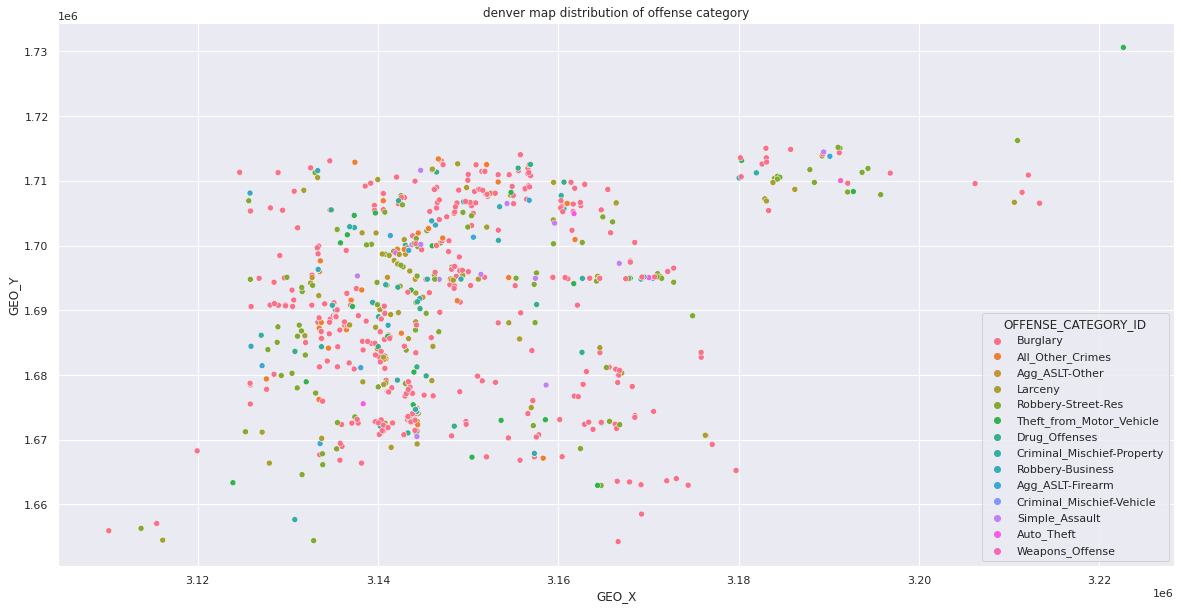

In [24]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=df1, x='GEO_X' , y='GEO_Y', hue='OFFENSE_CATEGORY_ID')
plt.title('denver map distribution of offense category')

In [25]:
df3 = df1.sort_values('FIRST_OCCURENCE_DATE')
df3['DIFF_REPORT_DATE'] = df1['REPORTDATE']-df1['FIRST_OCCURENCE_DATE']
df2['DIFF_REPORT_DATE'] = df1['REPORTDATE']-df1['FIRST_OCCURENCE_DATE']
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,INCIDENT_ID,FIRST_OCCURENCE_DATE,REPORTDATE,GEO_X,GEO_Y,INCIDENT_ADDRESS,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,MJ_RELATION_TYPE,NEIGHBORHOOD_ID,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,DIFF_REPORT_DATE
786,20122767,2012-01-03,2012-01-03,3156932.0,1710798.0,3900_E_48TH_AVE,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,elyria-swansea,2,212,2203,0 days
796,20123052,2012-01-03,2012-01-03,3156921.0,1712528.0,3995_E_50TH_AVE,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,elyria-swansea,2,212,2203,0 days
33,20124752,2012-01-04,2012-01-04,3145704.0,1692717.0,1120_N_LOGAN_ST,BURGLARY_RESIDENCE_NO_FORCE,Burglary,NON-INDUSTRY_,capitol-hill,6,623,2204,0 days
774,20129131,2012-01-06,2012-01-07,3150030.0,1695956.0,1728_E_17TH_AVE,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,city-park-west,6,622,2203,1 days
6,20129183,2012-01-06,2012-01-07,3150030.0,1695956.0,1730_E_17TH_AVE,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,city-park-west,6,622,2203,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,2016669500,2016-10-19,2016-10-19,3148501.0,1693749.0,1301_N_MARION_ST,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,cheesman-park,6,622,2203,0 days
1238,2016678007,2016-10-22,2016-10-22,3150881.0,1712463.0,5110_N_RACE_ST,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,elyria-swansea,2,212,2203,0 days
1225,2016678496,2016-10-22,2016-10-23,3143321.0,1692796.0,1133_N_BANNOCK_ST,BURGLARY_BUSINESS_BY_FORCE,Burglary,INDUSTRY_,civic-center,6,611,2203,1 days
1252,2016692084,2016-10-28,2016-10-28,3141128.0,1687684.0,260_N_SANTA_FE_DR,ROBBERY_BUSINESS,Robbery-Business,INDUSTRY_,baker,3,311,1202,0 days


In [26]:
df4 = df3['FIRST_OCCURENCE_DATE'].dt.strftime('%Y-%m')
df4 = df4.value_counts()
df4 = df4.reset_index()
d = {'index':'FIRST_OCCURENCE_DATE','FIRST_OCCURENCE_DATE':'CRIME_COUNT'}
df4.rename(columns=d,inplace=True)
df4 = df4.sort_values('FIRST_OCCURENCE_DATE')
print(df4.shape)
df4

(58, 2)


,FIRST_OCCURENCE_DATE,CRIME_COUNT
40,2012-01,18
56,2012-02,11
9,2012-03,27
36,2012-04,19
2,2012-05,30
26,2012-06,21
23,2012-07,22
24,2012-08,22
49,2012-09,16
34,2012-10,19


In [27]:
df4['OCCURENCE_YEAR'] = pd.DatetimeIndex(df4['FIRST_OCCURENCE_DATE']).year
df5 = df4.groupby('OCCURENCE_YEAR').sum()
df5 = df5.reset_index()
df5

,OCCURENCE_YEAR,CRIME_COUNT
0,2012,231
1,2013,246
2,2014,277
3,2015,257
4,2016,242


### The line plot below shows number of crime taking place in Denver from JAN 2012 to JUL 2014

Text(0.5, 0, 'JAN,2012 - JUL,2014')

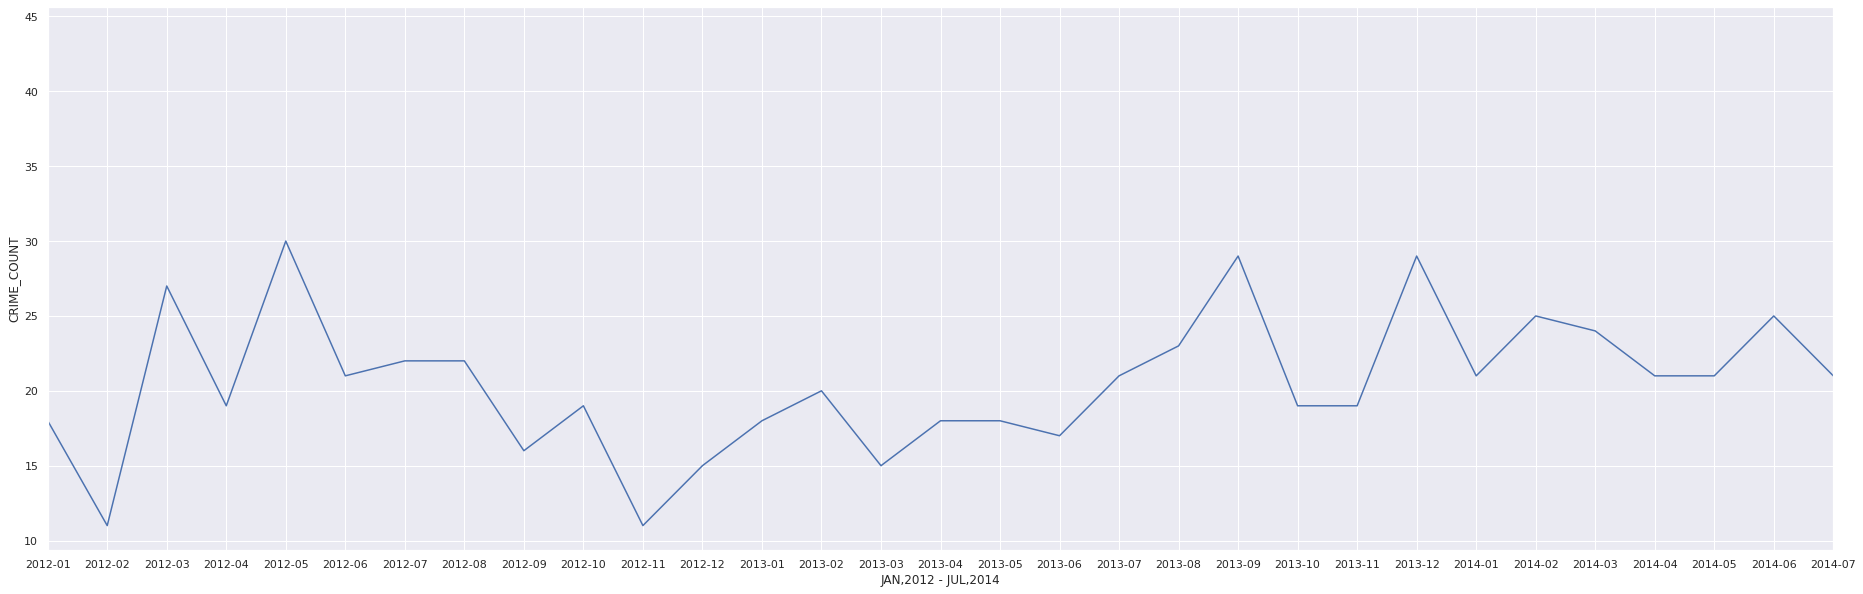

In [28]:
sns.set(rc={'figure.figsize':(32,10)})
f = sns.lineplot(data=df4, x='FIRST_OCCURENCE_DATE' , y='CRIME_COUNT')
f.set_xlim(0,30)
plt.xlabel("JAN,2012 - JUL,2014")

### The line plot below shows number of crime taking place in Denver from JUL 2014 to OCT 2016

Text(0.5, 0, 'JUL,2014 - OCT,2016')

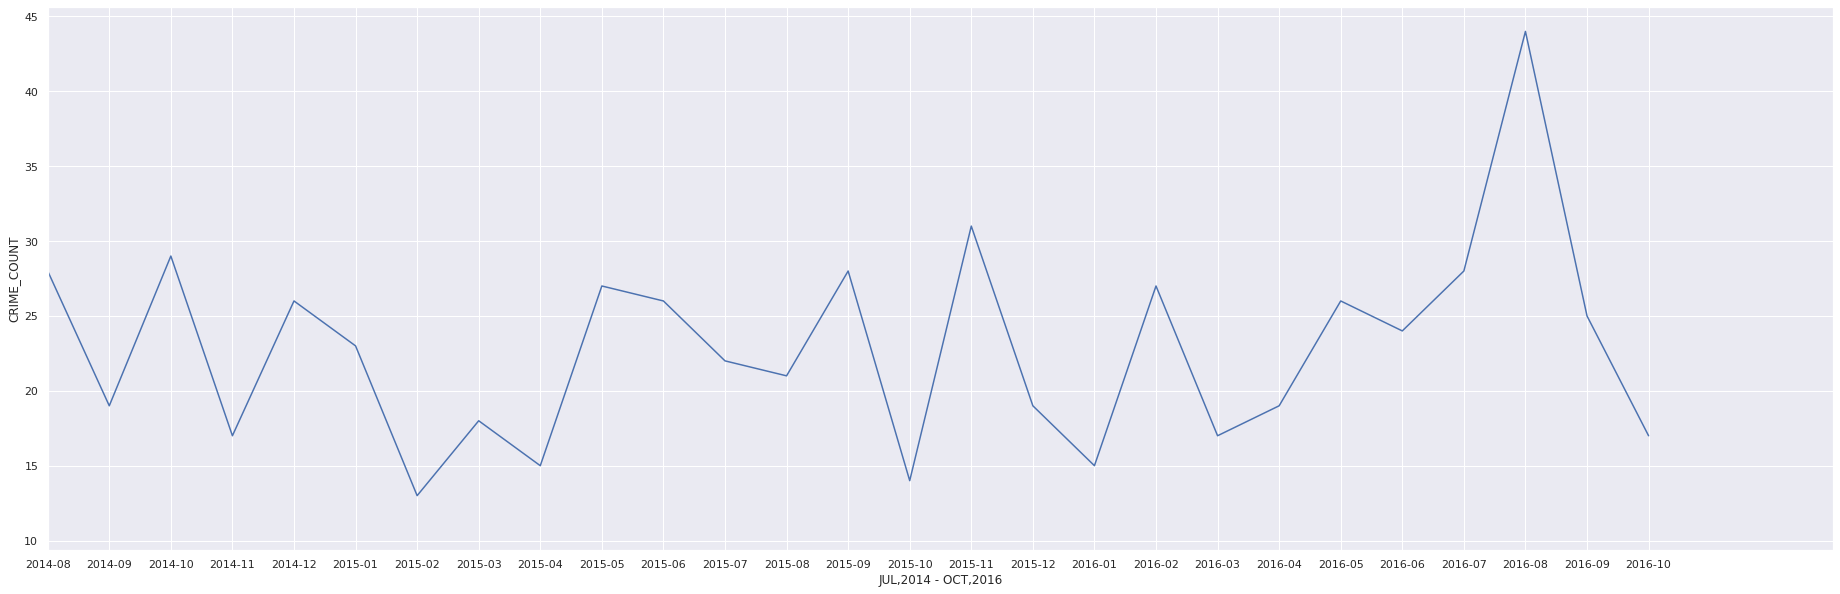

In [29]:
f = sns.lineplot(data=df4, x='FIRST_OCCURENCE_DATE' , y='CRIME_COUNT')
f.set_xlim(31,60)
plt.xlabel("JUL,2014 - OCT,2016")

### Yearly change in total number of crimes

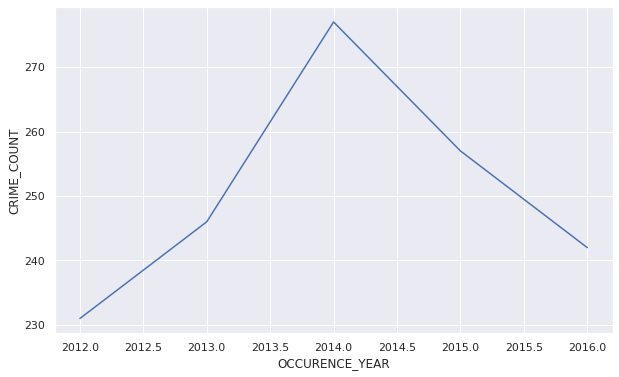

In [30]:
sns.set(rc={'figure.figsize':(10,6)})
f = sns.lineplot(data=df5, x='OCCURENCE_YEAR' , y='CRIME_COUNT')
# f.set_xlim(1,5)

In [31]:
df6=df3[['FIRST_OCCURENCE_DATE','DIFF_REPORT_DATE']]
x=df6['FIRST_OCCURENCE_DATE'].dt.strftime('%Y')
df6['FIRST_OCCURENCE_DATE']=x
df6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FIRST_OCCURENCE_DATE,DIFF_REPORT_DATE
786,2012,0 days
796,2012,0 days
33,2012,0 days
774,2012,1 days
6,2012,1 days
...,...,...
923,2016,0 days
1238,2016,0 days
1225,2016,1 days
1252,2016,0 days


In [32]:
for i in range(5):
  x = df6[pd.to_datetime(df6['FIRST_OCCURENCE_DATE'])<datetime.datetime(2013+i,1,1)]
  x = df6[pd.to_datetime(df6['FIRST_OCCURENCE_DATE'])>datetime.datetime(2011+i,12,31)]
  diff = x['DIFF_REPORT_DATE'].sort_values()
  print(diff)
  print(np.mean(diff))
  print()

786      0 days
154      0 days
1161     0 days
1201     0 days
589      0 days
         ...   
232    176 days
693    181 days
326    185 days
782    187 days
354    370 days
Name: DIFF_REPORT_DATE, Length: 1253, dtype: timedelta64[ns]
2 days 05:37:52.625698324

287      0 days
119      0 days
1061     0 days
1164     0 days
223      0 days
         ...   
515    147 days
974    168 days
232    176 days
326    185 days
354    370 days
Name: DIFF_REPORT_DATE, Length: 1022, dtype: timedelta64[ns]
2 days 01:49:54.129158512

654      0 days
212      0 days
239      0 days
1156     0 days
292      0 days
         ...   
990     80 days
974    168 days
232    176 days
326    185 days
354    370 days
Name: DIFF_REPORT_DATE, Length: 776, dtype: timedelta64[ns]
2 days 02:24:44.536082474

182      0 days
328      0 days
1214     0 days
296      0 days
850      0 days
         ...   
1009    29 days
60      37 days
990     80 days
232    176 days
326    185 days
Name: DIFF_REPORT_DATE, Length: 4

In [33]:
df6=df6.groupby('FIRST_OCCURENCE_DATE').mean()
df6

,DIFF_REPORT_DATE
FIRST_OCCURENCE_DATE,
2012,2 days 22:26:29.610389610
2013,2 days 00:00:00
2014,3 days 00:20:47.653429602
2015,2 days 16:26:08.871595330
2016,0 days 10:24:47.603305785


### The line plot shows the change in the difference between the date of reporting a crime and it's occurence date 

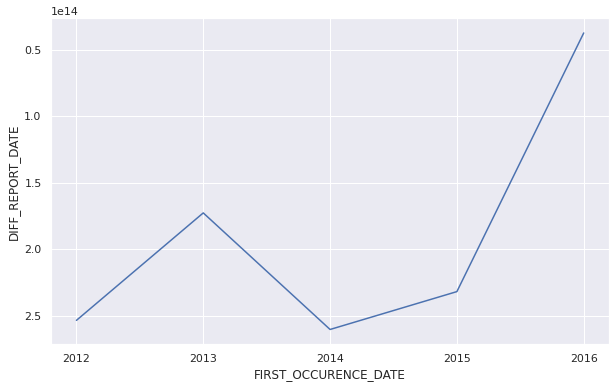

In [34]:
sns.set(rc={'figure.figsize':(10,6)})
f = sns.lineplot(data=df6, x='FIRST_OCCURENCE_DATE' , y='DIFF_REPORT_DATE')

### Count of crimes in each district with hue as offense category

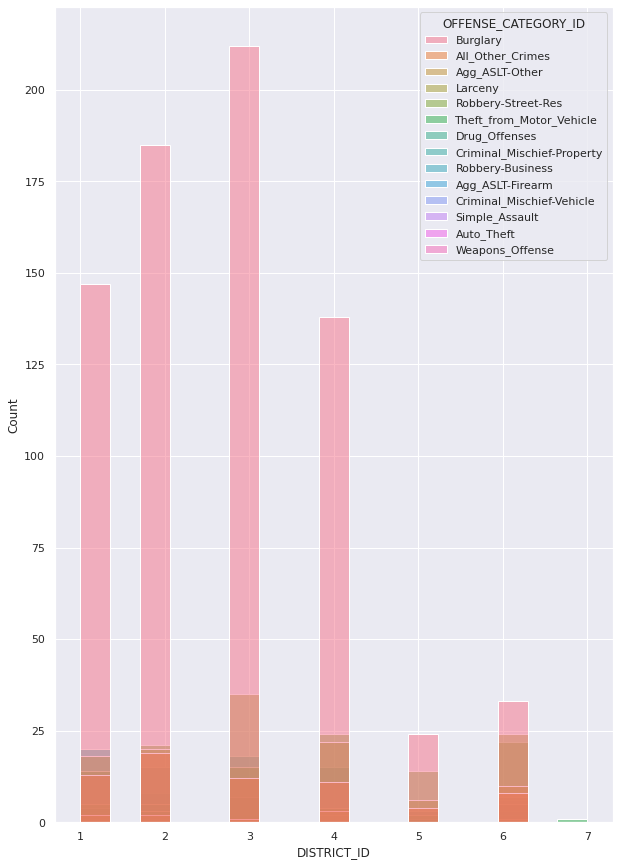

In [35]:
sns.set(rc={'figure.figsize':(10,15)})
f=sns.histplot(df1,x="DISTRICT_ID",hue='OFFENSE_CATEGORY_ID')

### Below Graphs are show distribution of crimes in each incident address, district, precinct and offense code

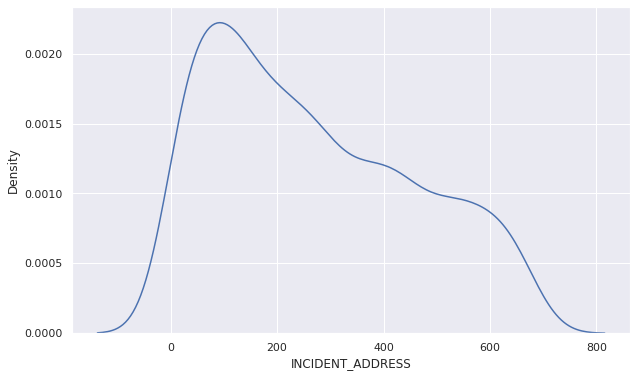

In [36]:
sns.set(rc={'figure.figsize':(10,6)})
sns.kdeplot(df2['INCIDENT_ADDRESS'])

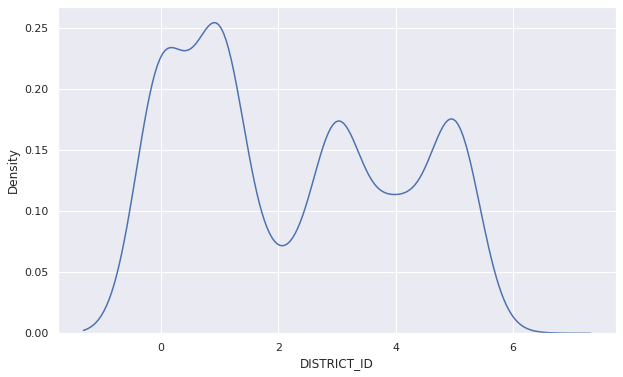

In [37]:
sns.set(rc={'figure.figsize':(10,6)})
sns.kdeplot(df2['DISTRICT_ID'])

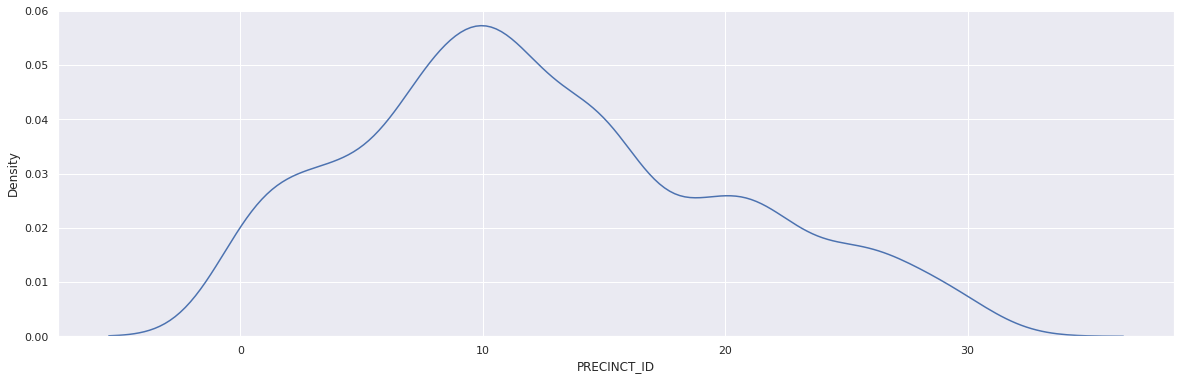

In [38]:
sns.set(rc={'figure.figsize':(20,6)})
sns.kdeplot(df2['PRECINCT_ID'])

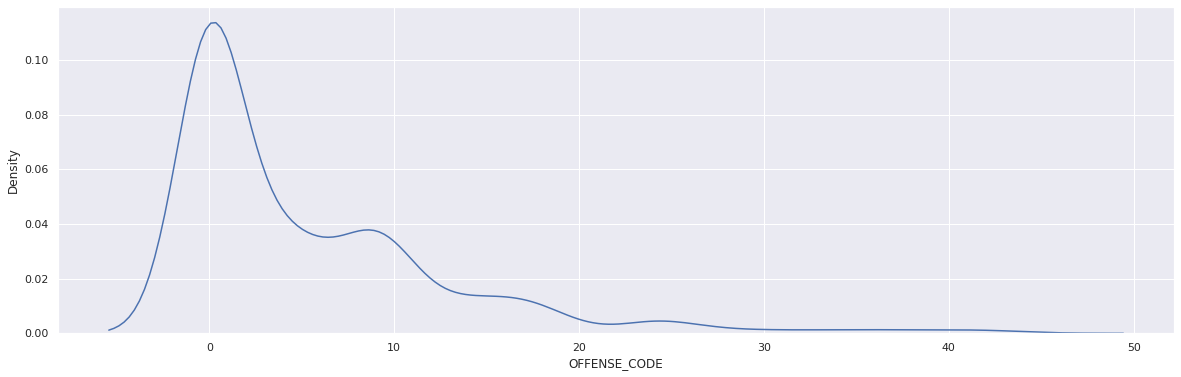

In [39]:
sns.kdeplot(df2['OFFENSE_CODE'])

In [40]:
categorical[3:]

['OFFENSE_TYPE_ID',
 'OFFENSE_CATEGORY_ID',
 'MJ_RELATION_TYPE',
 'NEIGHBORHOOD_ID',
 'DISTRICT_ID',
 'PRECINCT_ID',
 'OFFENSE_CODE']

In [41]:
df_list = []
for col in categorical[3:]:
  x = count_dict[col]
  y=[]
  for i in range(len(x)):
    y.append([i,x[i][1]])
  # count_dict[col]=y

  df_list.append(pd.DataFrame(y,columns=['Class','Count']))
# print(count_dict)

In [42]:
ct = 0
# print(categorical[:-1])


### Graph shows count of crime for each district, precinct, offense type, category of offense, and which neighbourhood it took place


OFFENSE_TYPE_ID


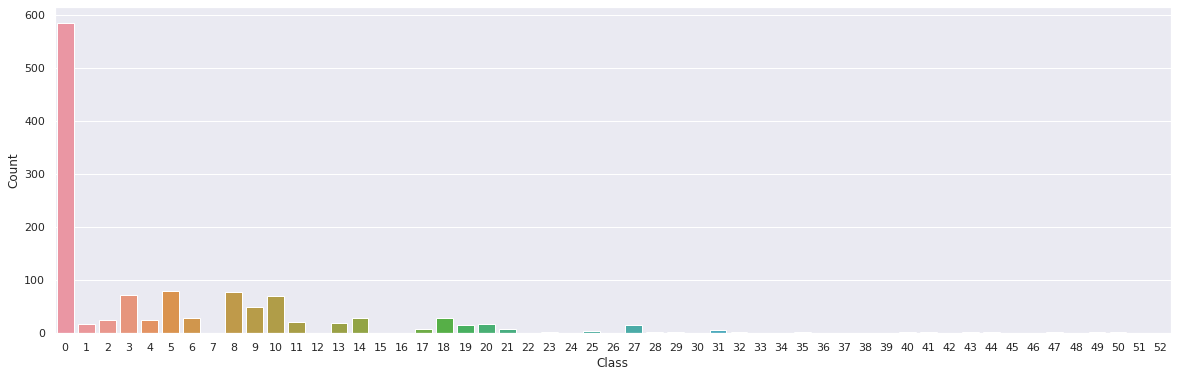

In [43]:
print(categorical[3:][ct])
sns.barplot(data=df_list[ct],x='Class',y='Count')
ct=ct+1

OFFENSE_CATEGORY_ID


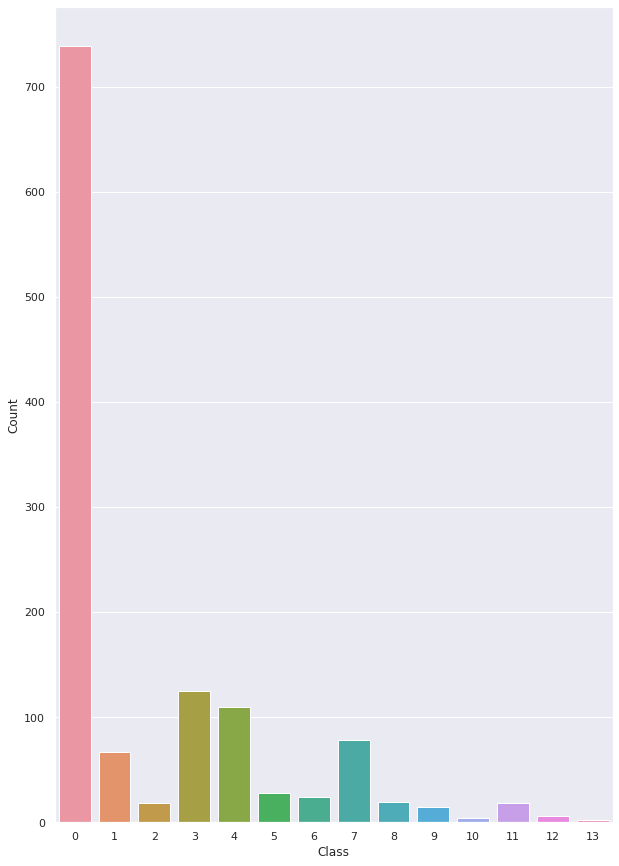

In [44]:
print(categorical[3:][ct])
sns.set(rc={'figure.figsize':(10,15)})
sns.barplot(data=df_list[ct],x='Class',y='Count')
ct=ct+1

MJ_RELATION_TYPE


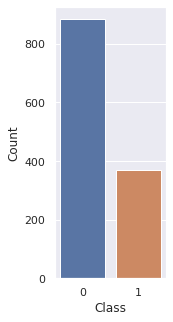

In [45]:
print(categorical[3:][ct])
sns.set(rc={'figure.figsize':(2,5)})
sns.barplot(data=df_list[ct],x='Class',y='Count')
ct=ct+1

NEIGHBORHOOD_ID


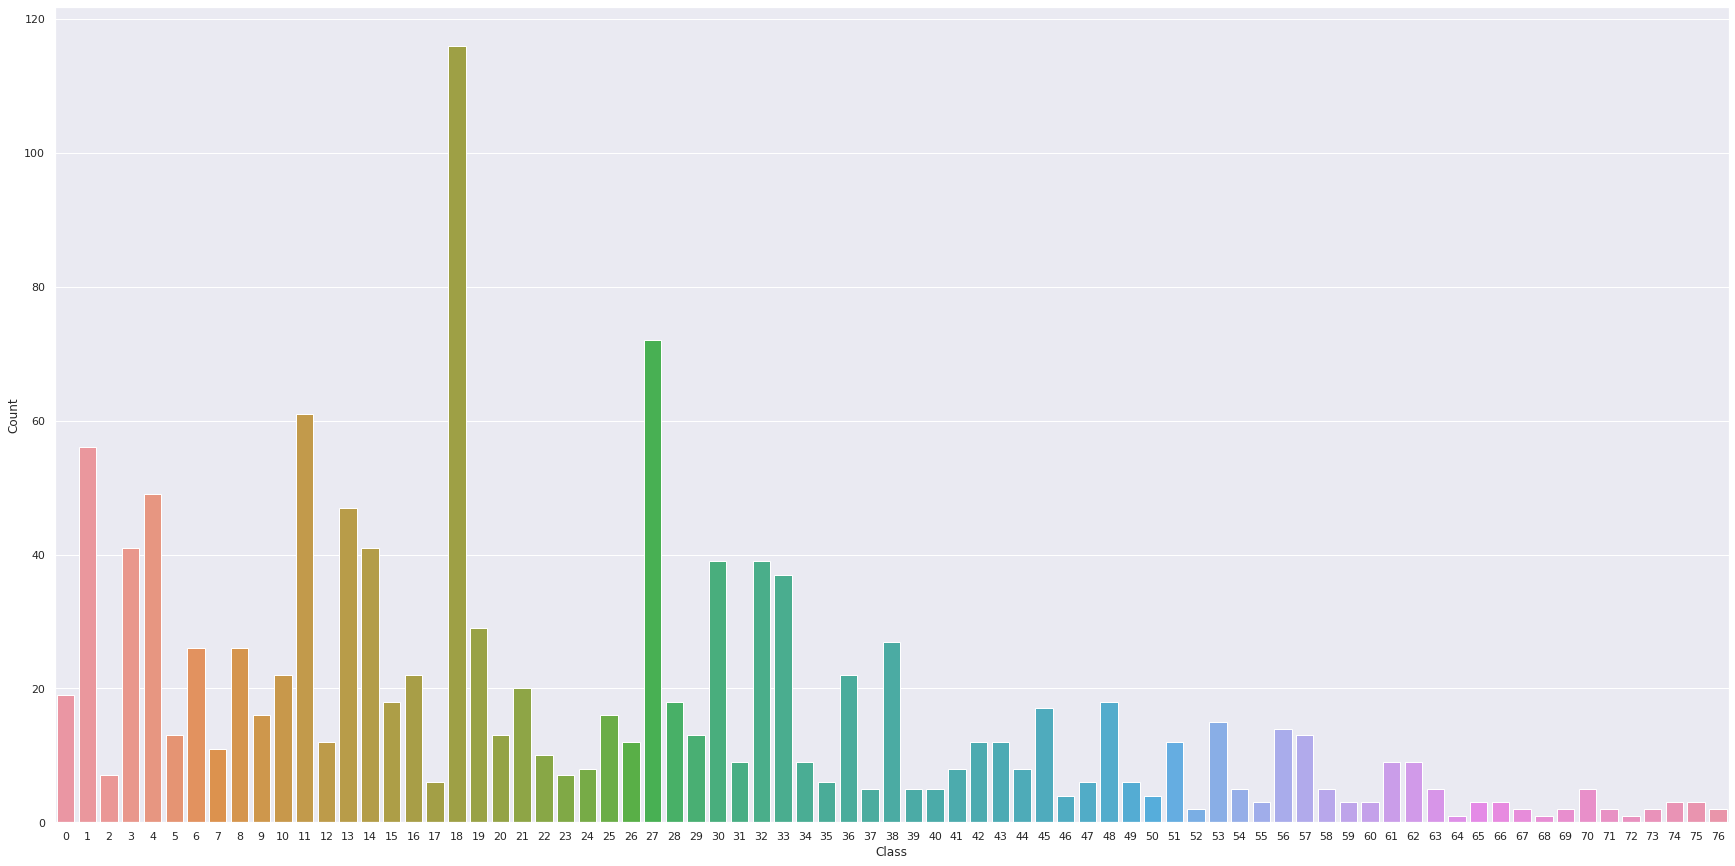

In [46]:
print(categorical[3:][ct])
sns.set(rc={'figure.figsize':(30,15)})
sns.barplot(data=df_list[ct],x='Class',y='Count')
ct=ct+1

DISTRICT_ID


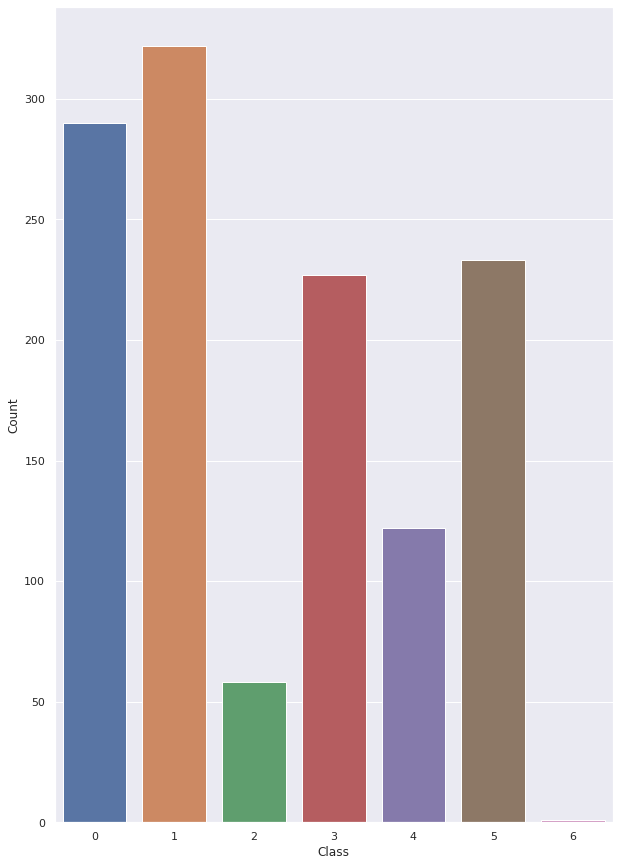

In [47]:
print(categorical[3:][ct])
sns.set(rc={'figure.figsize':(10,15)})
sns.barplot(data=df_list[ct],x='Class',y='Count')
ct=ct+1

PRECINCT_ID


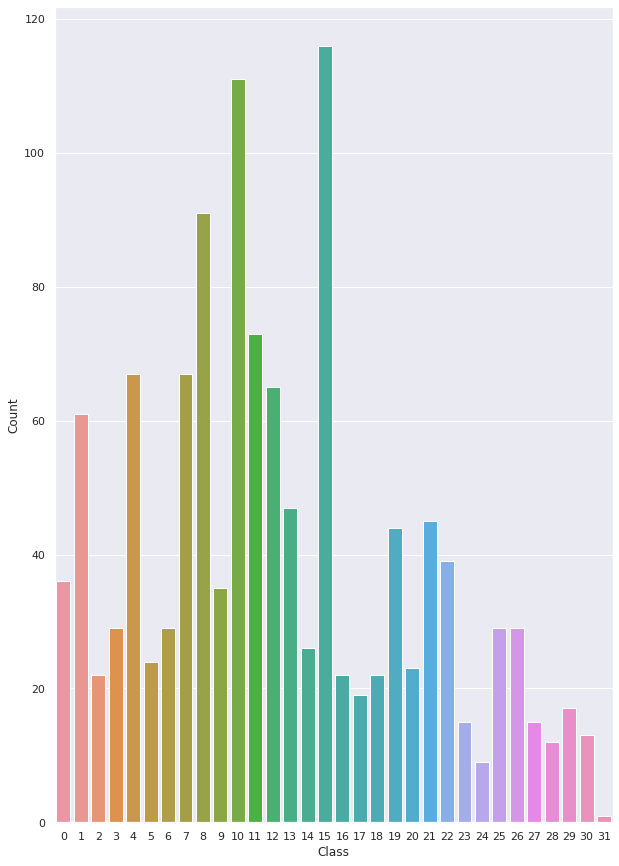

In [48]:
print(categorical[3:][ct])
sns.barplot(data=df_list[ct],x='Class',y='Count')
ct=ct+1

In [49]:
df7=df3[['OFFENSE_CATEGORY_ID','DIFF_REPORT_DATE']]
x = df7['DIFF_REPORT_DATE'].tolist()
df7['DIFF_REPORT_DATE'] = np.array([int(y.days) for y in x])
df7=df7.groupby('OFFENSE_CATEGORY_ID').mean()
df7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DIFF_REPORT_DATE
OFFENSE_CATEGORY_ID,
Agg_ASLT-Firearm,0.533333
Agg_ASLT-Other,0.055556
All_Other_Crimes,5.343284
Auto_Theft,6.666667
Burglary,0.875507
Criminal_Mischief-Property,5.141026
Criminal_Mischief-Vehicle,1.000000
Drug_Offenses,1.250000
Larceny,9.856000


In [50]:
df7=df7.reset_index()

### Graph shows offense category and mean of delay in reporting the crime

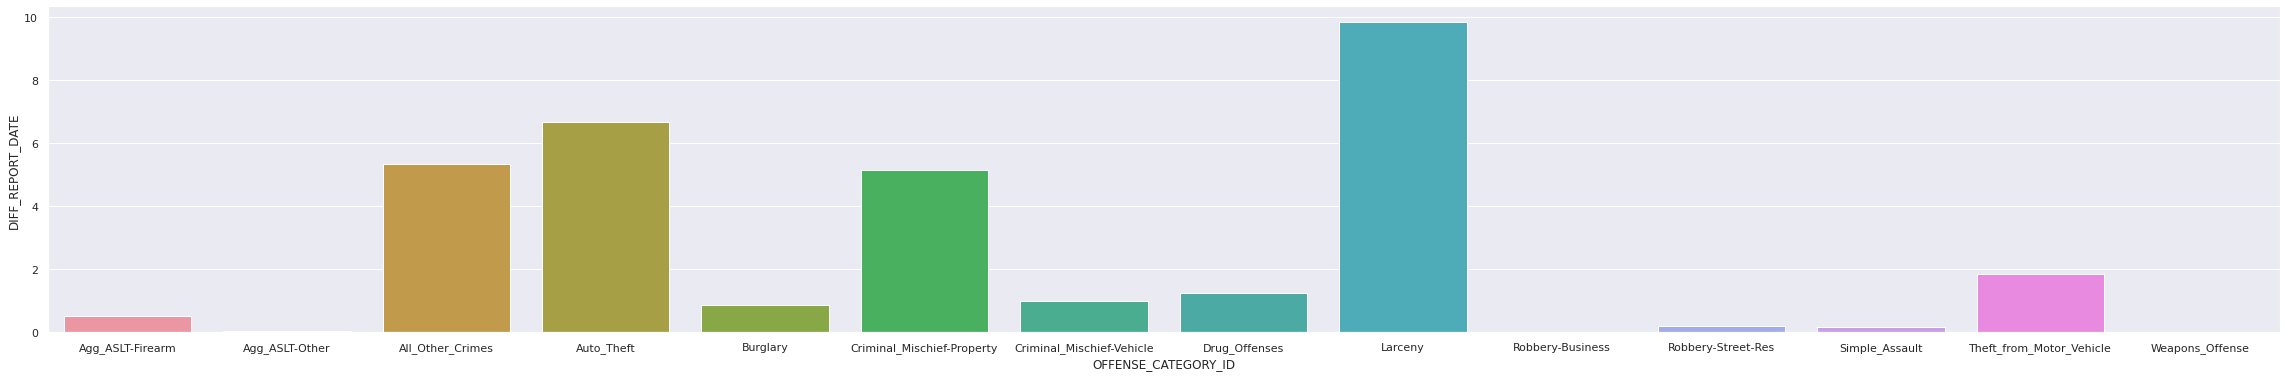

In [51]:
sns.set(rc={'figure.figsize':(40,6)})
sns.barplot(data=df7, x='OFFENSE_CATEGORY_ID',y='DIFF_REPORT_DATE')

In [52]:
df8=df3[['INCIDENT_ADDRESS','DIFF_REPORT_DATE']]
x = df8['DIFF_REPORT_DATE'].tolist()
df8['DIFF_REPORT_DATE'] = np.array([int(y.days) for y in x])
df8=df8.groupby('INCIDENT_ADDRESS').mean()
df8=df8.reset_index()
df8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,INCIDENT_ADDRESS,DIFF_REPORT_DATE
0,0_BLOCK_S_SANTA_FE_DR,0.000000
1,1000_BLOCK_N_SHERMAN_ST,0.000000
2,1005_N_FEDERAL_BLVD,0.400000
3,1015_W_EVANS_AVE,0.333333
4,1031_W_CENTER_AVE,0.000000
...,...,...
674,W_1ST_AVE_/_N_KNOX_CT,1.000000
675,W_29TH_AVE_/_N_HURON_ST,0.000000
676,W_9TH_AVE_/_N_VALLEJO_ST,0.000000
677,W_CEDAR_AVE_/_S_RALEIGH_ST,0.000000


In [53]:
x = numerical_rept['INCIDENT_ADDRESS']
x1=x.keys()
x2=x.values()
df8['INCIDENT_ADDRESS'].replace(x1,x2,inplace=True)
df8

,INCIDENT_ADDRESS,DIFF_REPORT_DATE
0,651,0.000000
1,320,0.000000
2,38,0.400000
3,361,0.333333
4,175,0.000000
...,...,...
674,250,1.000000
675,258,0.000000
676,434,0.000000
677,594,0.000000


### Graph shows incident address and mean of delay in reporting the crime

(22, 2)


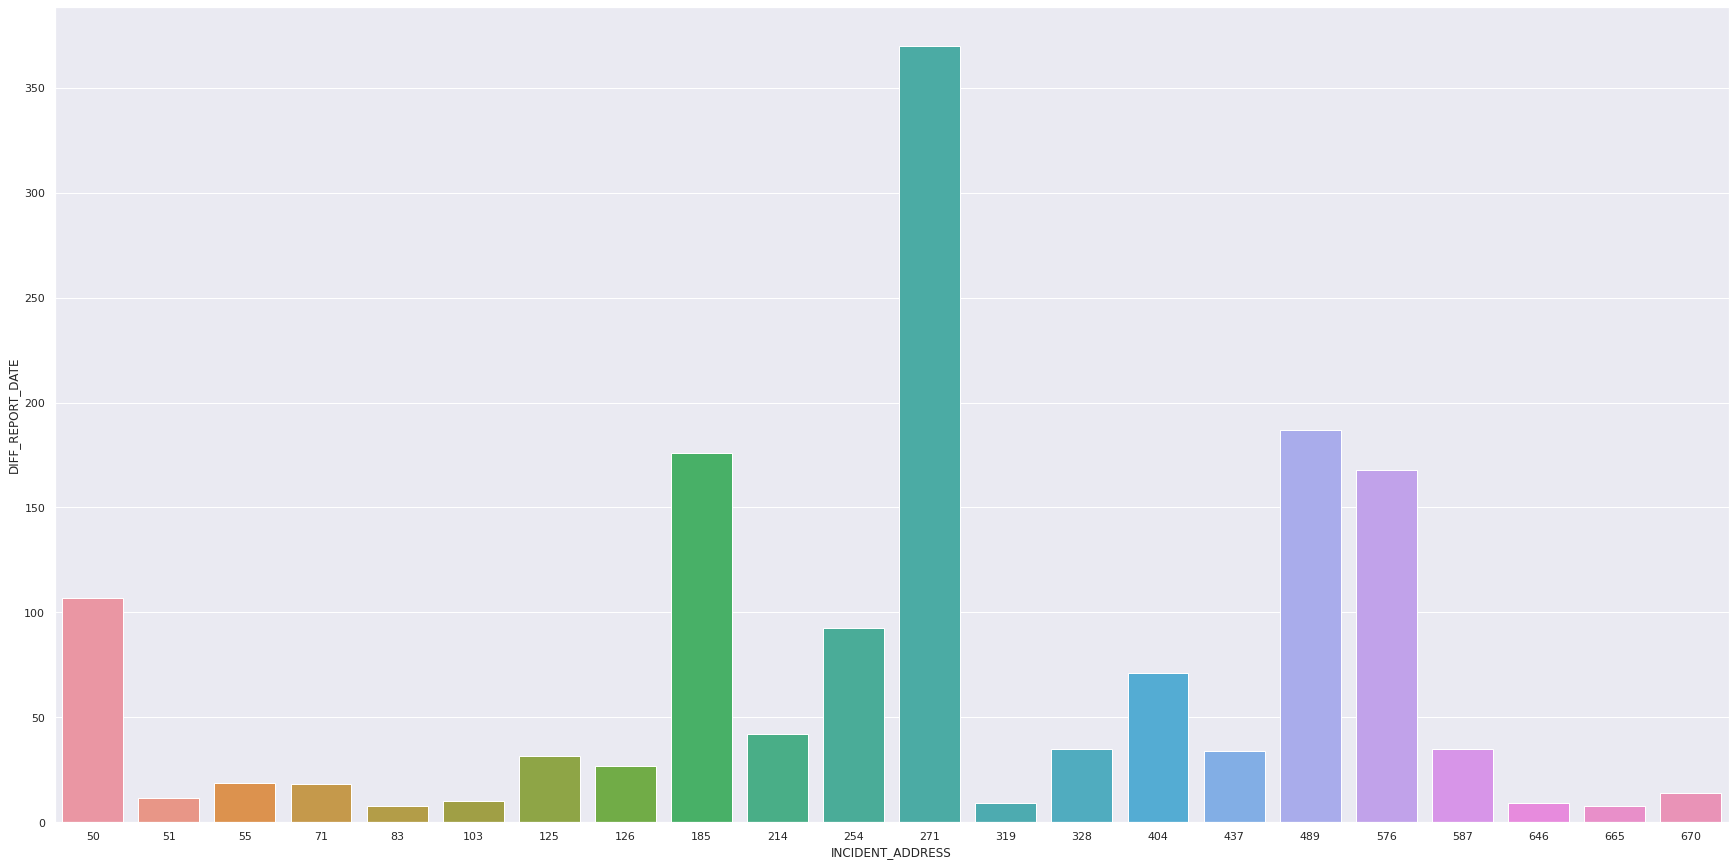

In [54]:
df8 = df8[df8['DIFF_REPORT_DATE']>5]
print(df8.shape)
sns.set(rc={'figure.figsize':(30,15)})
sns.barplot(data=df8,x='INCIDENT_ADDRESS',y='DIFF_REPORT_DATE')

In [55]:
df1.loc[df2.where(df2['INCIDENT_ADDRESS']==271).dropna().index[0]]


INCIDENT_ID                               201563664
FIRST_OCCURENCE_DATE            2014-01-28 00:00:00
REPORTDATE                      2015-02-02 00:00:00
GEO_X                                     3135510.0
GEO_Y                                     1681267.0
INCIDENT_ADDRESS                    745_S_BRYANT_ST
OFFENSE_TYPE_ID         BURGLARY_RESIDENCE_NO_FORCE
OFFENSE_CATEGORY_ID                        Burglary
MJ_RELATION_TYPE                      NON-INDUSTRY_
NEIGHBORHOOD_ID                         athmar-park
DISTRICT_ID                                       4
PRECINCT_ID                                     412
OFFENSE_CODE                                   2204
Name: 354, dtype: object

In [56]:
df9=df3[['PRECINCT_ID','DIFF_REPORT_DATE']]
x = df9['DIFF_REPORT_DATE'].tolist()
df9['DIFF_REPORT_DATE'] = np.array([int(y.days) for y in x])
df9=df9.groupby('PRECINCT_ID').mean()
df9=df9.reset_index()
x = numerical_rept['PRECINCT_ID']
x1=x.keys()
x2=x.values()
df9['PRECINCT_ID'].replace(x1,x2,inplace=True)
df9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PRECINCT_ID,DIFF_REPORT_DATE
0,14,0.538462
1,11,0.657534
2,16,0.227273
3,20,0.304348
4,19,0.431818
5,21,2.822222
6,1,1.016393
7,15,3.232759
8,24,0.444444
9,22,4.102564


### Graph shows precinct id and mean of delay in reporting the crime

(32, 2)


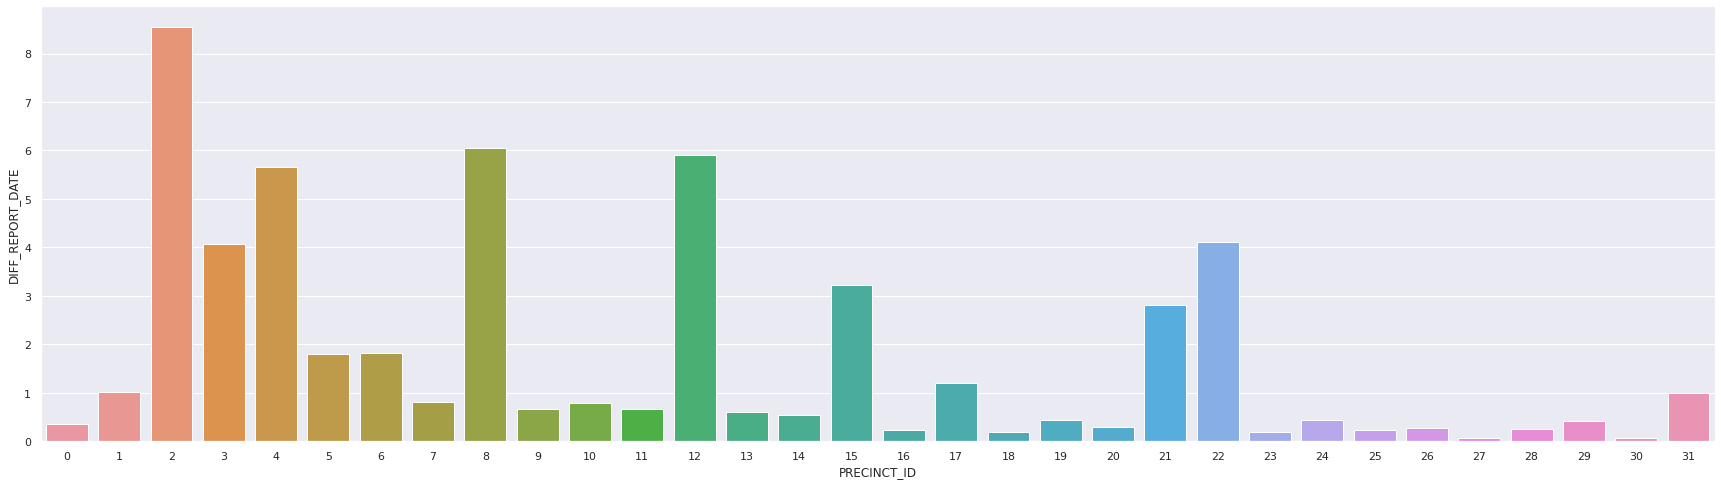

In [57]:
# df9 = df9[df9['DIFF_REPORT_DATE']>4]
print(df9.shape)
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(data=df9,x='PRECINCT_ID',y='DIFF_REPORT_DATE')

### Comparison of count of offenses from all categories in each district of denver

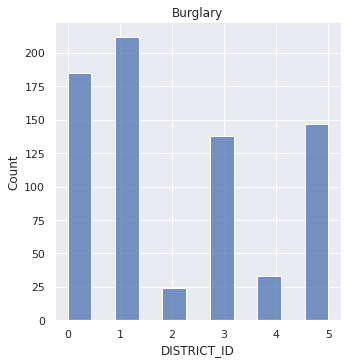

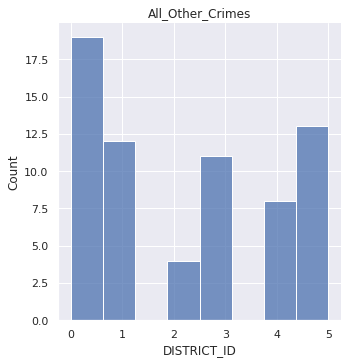

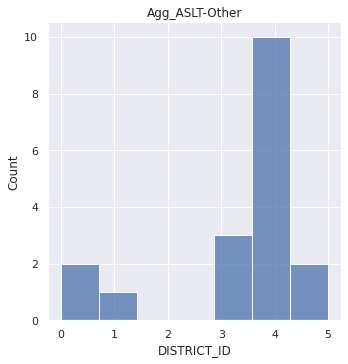

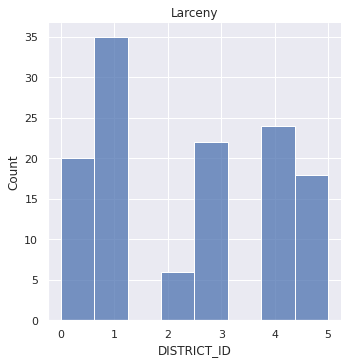

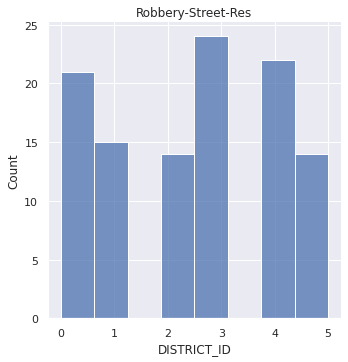

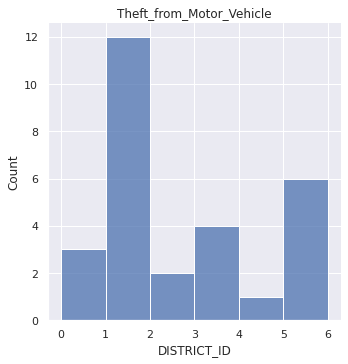

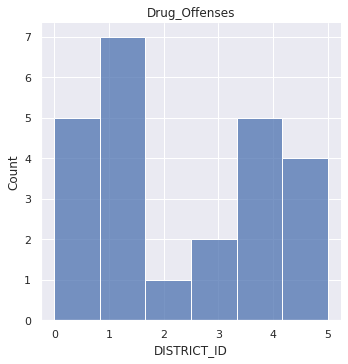

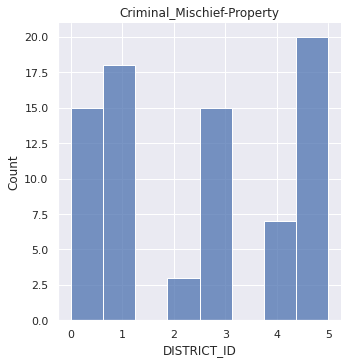

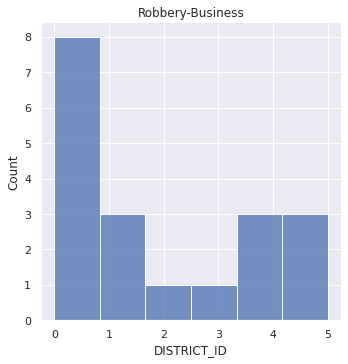

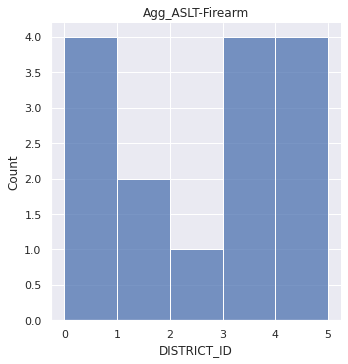

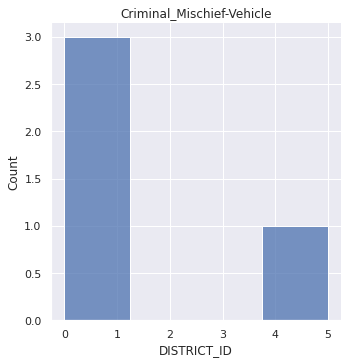

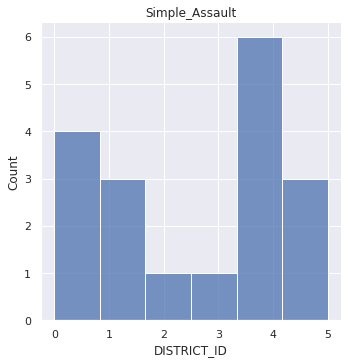

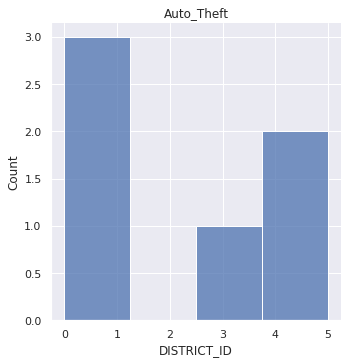

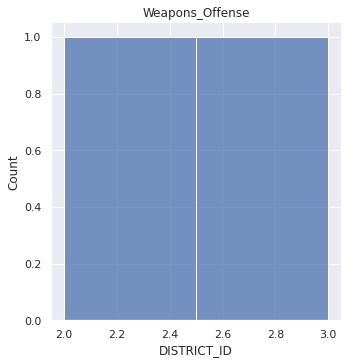

In [58]:
xy = numerical_rept['OFFENSE_CATEGORY_ID']
l = list(xy.keys())
for cl in l:
  x = df2[['DISTRICT_ID','PRECINCT_ID']].where(df2['OFFENSE_CATEGORY_ID']==numerical_rept['OFFENSE_CATEGORY_ID'][cl]).dropna()
  sns.displot(x,x='DISTRICT_ID')
  plt.title(cl)
  # print(cl)


In [59]:
x = df2[['DISTRICT_ID','PRECINCT_ID']].where(df2['OFFENSE_CATEGORY_ID']==numerical_rept['OFFENSE_CATEGORY_ID']['Weapons_Offense']).dropna()
x

,DISTRICT_ID,PRECINCT_ID
1059,2.0,3.0
1243,3.0,12.0


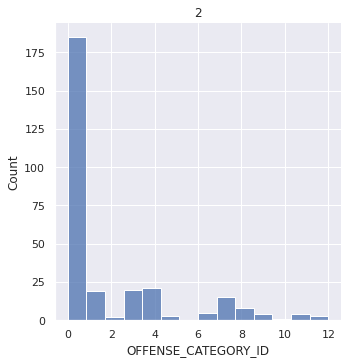

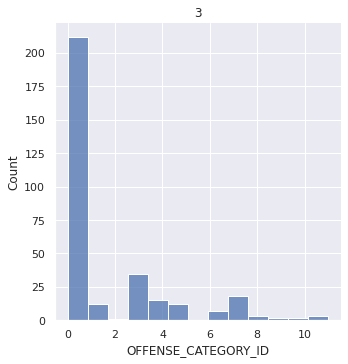

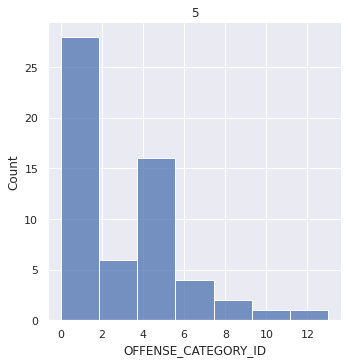

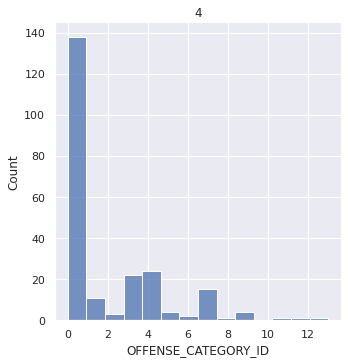

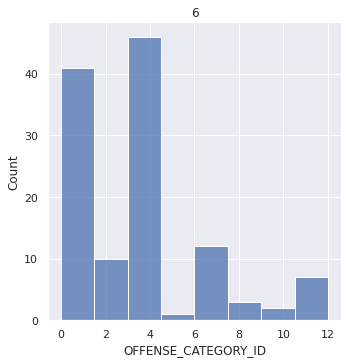

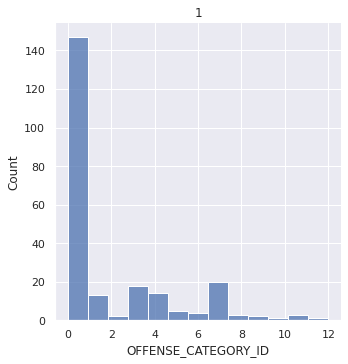

In [60]:
sns.set(rc={'figure.figsize':(20,8)})
xy = numerical_rept['DISTRICT_ID']
l = list(xy.keys())[:-1]
for cl in l:
  x = df2[['OFFENSE_CATEGORY_ID','OFFENSE_TYPE_ID']].where(df2['DISTRICT_ID']==numerical_rept['DISTRICT_ID'][cl]).dropna()
  sns.displot(x,x='OFFENSE_CATEGORY_ID')
  plt.title(cl)
  # print(cl)


### **Inference**:

In this experiment, the objective was to perform exploratory data analysis on the given dataset. The dataset for this experiment is about criminal data of the city of Denver between Jan,2012 and Oct,2016. Initially, I have performed basic operations like the total data shape, finding the missing values and the removing them, number of classes and samples available per class. The classes were then converted into numeric representation. Using seaborn library, graphs are plotted of types like histogram, barplot, distribution plot, scatterplot and lineplot. From these graphs some of the inference made were:
* from the sactter plot, which shows distribution of crime across denver, most of the crime took place in the central region and the number decreases as it moves to the corners
* from the lineplots, one can see how the crimes increased/decreased from Jan,2012 to Oct,2016 and also how it changed on yearly basis
* the total number of offenses when viewed on the monthly basis has an uneven distribution but when viewed yearly, it shows increase in cases for 3 years with peak at 2014 and decline in the next 2 years.
* from the lineplot between year of incidents and delay in reporting a crime, it is obsereved that the average time(number of days) between an incident occurring and a report being filed decreased. 
* from the distribution plot for districts in denver, we can see that most of the crimes that took place in each district were of the category 'Burglary'
* from the distribution plots, we can see that for incident address, district, precinct and offense code, how the total criminal acts that took place is distributed.
* from the histplot between average delay in reporting a crime and offense category, the category 'Larceny' has the highest average delay
* the address '745_S_BRYANT_ST' had reported an offense of Burglary, of category 'Burglar_No_Force' located in the district with id '4' and at precinct id '412' on '2015-02-02'. The crime took place on '2014-01-28' 
* the precinct with id 323 has the highest average delay having a crime reported
* the district with id 2 and precinct with id 212 had the highest number of crime reported
* neighbourhood - 'elyria-swansea' had reported highest number of criminal offenses
* most of the incidents reported had connections to marijuana industry (~800/1253).
* 'burglary' is most repeated offense, the district with id '3' has seen a lot of cases of burglary while district with id '2' least.

